In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1 L2')

In [3]:
the1, the2, phi1, phi2 = smp.symbols(r'\theta_1 \theta_2 \phi_1 \phi_2', cls=smp.Function)

In [4]:
the1 = the1(t)
the2 = the2(t)
phi1 = phi1(t)
phi2 = phi2(t)

In [5]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
phi1_d = smp.diff(phi1, t)
phi2_d = smp.diff(phi2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)
phi1_dd = smp.diff(phi1_d, t)
phi2_dd = smp.diff(phi2_d, t)

In [6]:
x1 = L1*smp.sin(the1)*smp.cos(phi1)
y1 = L1*smp.sin(the1)*smp.sin(phi1)
z1 = -L1*smp.cos(the1)
x2 = x1 + L2*smp.sin(the2)*smp.cos(phi2)
y2 = y1 + L2*smp.sin(the2)*smp.sin(phi2)
z2 = z1 - L2*smp.cos(the2)

In [7]:
x1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x1)
y1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y1)
z1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z1)
x2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x2)
y2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y2)
z2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z2)

In [8]:
#kinetic
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2 + smp.diff(z1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2 + smp.diff(z2, t)**2)
T = T1 + T2

#Potential Energy
V1 = m1*g*z1
V2 = m2*g*z2
V = V1+V2

#Lagrangian
L = T - V

In [9]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()
LE3 = smp.diff(L, phi1) - smp.diff(smp.diff(L, phi1_d), t).simplify()
LE4 = smp.diff(L, phi2) - smp.diff(smp.diff(L, phi2_d), t).simplify()

In [10]:
the1_dd

Derivative(\theta_1(t), (t, 2))

In [11]:
sols = smp.solve((LE1, LE2, LE3, LE4), (the1_dd, the2_dd, phi1_dd, phi2_dd), simplify=False, rational=False)

In [13]:
do1dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d, phi1, phi2, phi1_d, phi2_d), sols[the1_dd])
do2dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d, phi1, phi2, phi1_d, phi2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dw1dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d, phi1, phi2, phi1_d, phi2_d), sols[phi1_dd])
dw2dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d, phi1, phi2, phi1_d, phi2_d), sols[phi2_dd])
dphi1dt_f = smp.lambdify(phi1_d, phi1_d)
dphi2dt_f = smp.lambdify(phi2_d, phi2_d)

In [19]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, the2, phi1, phi2, o1, o2, w1, w2 = S
    return [
        dthe1dt_f(o1),
        dthe2dt_f(o2),
        dphi1dt_f(w1),
        dphi2dt_f(w2),
        do1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        do2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
    ]

In [22]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1 = 2
m2 = 1
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, -np.pi, 3, 4, -3, -4], t=t, args=(g, m1, m2, L1, L2))

In [23]:
ans.T

array([[   1.04719755,    1.16583784,    1.28192219, ...,    0.47528255,
           0.5263446 ,    0.58014501],
       [   1.04719755,    1.18954298,    1.30050196, ...,    1.74237645,
           1.22746685,    0.66198651],
       [   0.        ,   -0.11277352,   -0.21472167, ..., -111.15864706,
        -111.35948435, -111.43719775],
       ...,
       [   4.        ,    3.13947062,    2.43974477, ...,  -12.3149275 ,
         -13.48032097,  -14.68887068],
       [  -3.        ,   -2.66332621,   -2.45167399, ...,   -6.6382618 ,
          -3.3935356 ,   -0.64355166],
       [  -4.        ,   -3.50601741,   -3.32130216, ...,   -0.98155776,
          -1.78772936,   -6.7990101 ]])

In [24]:
the1 = ans.T[0]
the2 = ans.T[1]

In [26]:
def get_pos(the1, the2, phi1, phi2, L1, L2):
    return (x1_f(the1, the2, phi1, phi2, L1, L2),
            y1_f(the1, the2, phi1, phi2, L1, L2),
            z1_f(the1, the2, phi1, phi2, L1, L2),
            x2_f(the1, the2, phi1, phi2, L1, L2),
            y2_f(the1, the2, phi1, phi2, L1, L2),
            z2_f(the1, the2, phi1, phi2, L1, L2))

x1, y1, z1, x2, y2, z2 = get_pos(ans.T[0],ans.T[1],ans.T[2],ans.T[3], L1, L2)
np.save('../3d_Pendulum/Data', np.array([x1,y1,z1,x2,y2,z2]))

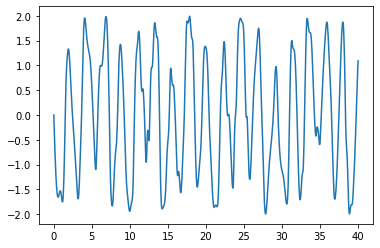

In [28]:
plt.plot(t, y1)
plt.show()